In [45]:
import numpy as np
import visualization
from NeuralNetwork import*
np.random.seed(1)

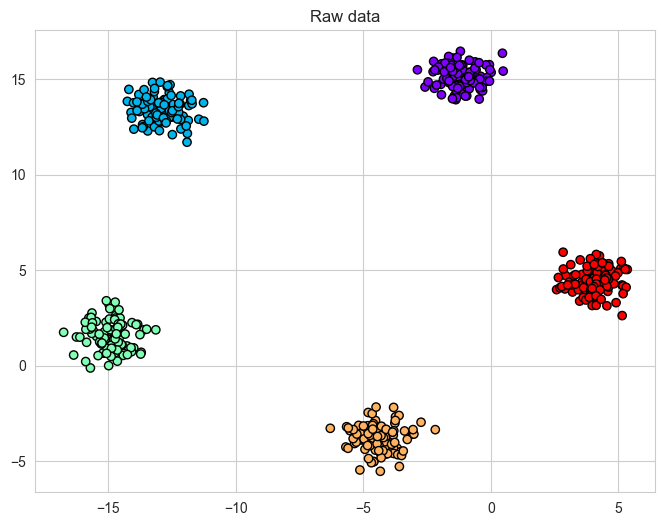

In [46]:
# load data
data = np.loadtxt('tren_data1___09.txt')
# data = np.loadtxt('tren_data2___09.txt')

visualization.plot_data(data, title='Raw data')

In [47]:
# shuffle data
data = np.random.permutation(data)
data_train = data[:int(len(data)*0.1)]
data_test = data[int(len(data)*0.1):]
x_train = data_train[:,:-1].T
y_train_raw = data_train[:,-1]
x_test = data_test[:,:-1].T
y_test = data_test[:,-1]
num_classes = len(np.unique(y_train_raw))

# to one hot
def to_one_hot(y, num_classes):
    y = y.astype(int)
    one_hot = np.zeros((num_classes, y.shape[0]), dtype=int)
    for i in range(y.shape[0]):
        one_hot[y[i]-1, i] = 1
    return one_hot
y_train = to_one_hot(y_train_raw, num_classes)
y_test = y_test.reshape(1, y_test.shape[0])

In [48]:
print ('Number of training examples: ', x_train.shape[1])
print ('Number of testing examples: ', x_test.shape[1])
print ('------')
print ('x_train shape: ', x_train.shape)
print ('y_train shape: ', y_train.shape)
print ('x_test shape: ', x_test.shape)
print ('y_test shape: ', y_test.shape)
print ('------')
print ('Number of classes: ', num_classes)

Number of training examples:  50
Number of testing examples:  450
------
x_train shape:  (2, 50)
y_train shape:  (5, 50)
x_test shape:  (2, 450)
y_test shape:  (1, 450)
------
Number of classes:  5


In [49]:
input_layer = x_train.shape[0] # set input layer size
dims = [input_layer, 10, 5] # set layer number and sizes

# parameters, costs = model(x_train, y_train, dims, learning_rate=0.0075, epochs = 2000, print_cost = True)
nn = DNNClassifier(dims, [DNNClassifier.relu, DNNClassifier.sigmoid])
parameters = nn.parameters
costs = nn.train(x_train, y_train, learning_rate=0.0075, epochs = 100, batch_size=1, print_cost = True)

Training model...
Cost after iteration 0: [0.8096866  0.49836127 0.58395441 0.60920607 0.12097674]
Cost after iteration 1: [0.37403723 0.53219715 0.27155857 0.08869254 0.00714615]
Cost after iteration 2: [1.12306343 0.95972905 0.30592331 0.07759082 0.02720773]
Cost after iteration 3: [0.06238827 0.03539842 0.09819707 0.09445877 0.1539321 ]
Cost after iteration 4: [0.30912762 0.29829675 0.09147496 0.0019727  0.00056888]
Cost after iteration 5: [0.05763889 0.03459556 0.06828534 0.07128355 0.09923217]
Cost after iteration 6: [0.00712637 0.01405746 0.16219334 0.02689661 0.00039098]
Cost after iteration 7: [0.01347451 0.02089096 0.29457398 0.01842572 0.00040131]
Cost after iteration 8: [0.00522998 0.00539295 0.08964734 0.0374143  0.00033398]
Cost after iteration 9: [0.87385576 0.78879805 0.1840431  0.04266743 0.036021  ]
Cost after iteration 10: [0.00171623 0.00107536 0.00621401 0.00327098 0.00265472]
Cost after iteration 11: [0.00137105 0.0008948  0.00519022 0.00272918 0.0020434 ]
Cost aft

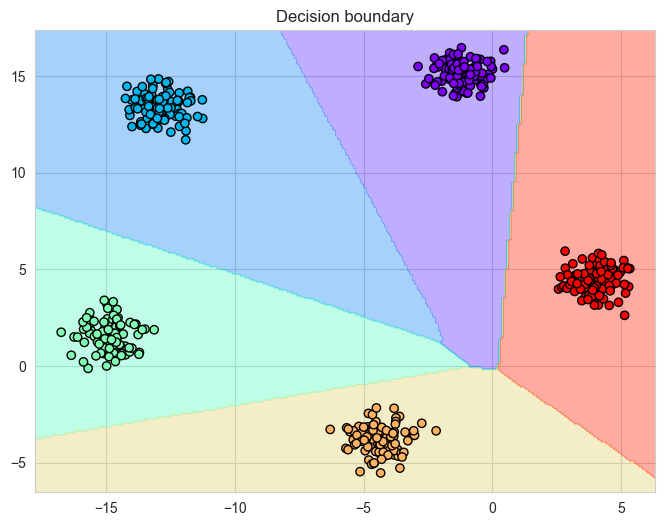

In [50]:
%matplotlib inline
visualization.plot_decision_boundary(data, nn, title='Decision boundary')


In [51]:
A = nn.forward_propagation(x_test)

accuracy:        1.0
confusion matrix: 


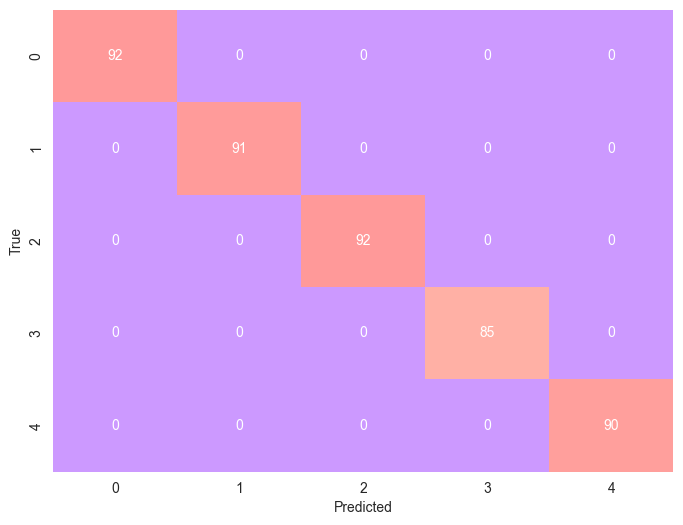

In [52]:
accuracy, confusion_matrix = nn.evaluate(x_test, y_test, confusion_matrix=True)
print('accuracy:       ', accuracy)
print('confusion matrix: ')
visualization.plot_confusion_matrix(confusion_matrix)

In [53]:
print(A.shape[0])
preds = np.argmax(A, axis=0)
print(preds)
print(np.array(y_test, dtype=int)[0])
import seaborn as sns
colors = sns.color_palette(palette='Set2')
print(colors)

5
[1 2 0 4 4 0 3 3 0 3 3 0 2 3 3 3 3 3 2 1 3 3 1 0 1 4 4 4 2 1 2 1 1 4 1 2 4
 2 4 4 4 4 4 0 4 0 1 0 2 1 2 4 4 0 3 0 3 2 2 1 3 3 4 4 2 1 4 0 0 4 4 0 1 2
 1 2 4 3 0 0 4 0 4 0 3 3 4 4 3 2 1 1 2 2 2 3 1 0 1 0 0 0 2 0 3 2 2 1 0 2 2
 3 3 2 4 2 1 0 4 2 0 0 3 0 1 1 1 0 2 0 2 4 3 1 3 2 0 1 0 3 2 2 4 3 1 3 1 2
 2 4 3 4 3 2 0 4 1 1 1 4 1 0 3 2 1 1 1 0 1 0 0 0 4 0 3 1 2 4 4 4 4 0 3 2 4
 0 1 2 4 1 1 2 2 1 4 4 1 2 4 4 3 3 0 1 4 4 4 4 3 1 4 3 2 4 2 1 4 0 2 4 4 1
 2 1 2 0 1 3 2 1 1 0 4 0 0 0 0 4 4 2 0 2 3 0 4 4 4 0 4 3 0 0 0 3 3 2 4 0 3
 1 2 3 2 0 2 3 1 1 0 1 2 1 2 1 2 4 4 4 2 2 0 4 4 3 3 1 0 1 2 1 3 1 4 0 1 3
 1 1 3 1 4 1 2 1 3 3 3 0 0 1 1 1 2 1 3 4 0 2 0 2 2 0 3 3 3 0 4 0 4 3 0 2 0
 2 4 1 4 0 0 2 2 4 2 3 3 3 1 1 4 3 1 0 3 2 4 0 2 1 4 2 2 1 1 0 4 1 3 3 2 1
 1 2 4 1 1 2 3 2 3 0 1 0 0 2 3 1 3 3 0 0 0 2 0 4 0 4 3 4 0 1 4 1 4 2 2 2 3
 3 0 3 0 3 3 0 4 1 0 3 2 2 0 0 3 4 1 2 3 4 4 3 2 2 1 2 3 2 0 4 1 1 4 3 1 2
 3 2 0 3 2 0]
[2 3 1 5 5 1 4 4 1 4 4 1 3 4 4 4 4 4 3 2 4 4 2 1 2 5 5 5 3 2 3 2 2 5 2 3 5
 3 5 5 5 

In [56]:
# from IPython.display import clear_output
# from matplotlib import pyplot as plt
# import collections
# %matplotlib inline
# 
# def live_plot(data_dict, figsize=(7,5), title=''):
#     clear_output(wait=True)
#     plt.figure(figsize=figsize)
#     for label,data in data_dict.items():
#         plt.plot(data, label=label)
#     plt.title(title)
#     plt.grid(True)
#     plt.xlabel('epoch')
#     plt.legend(loc='center left') # the plot evolves to the right
#     plt.show()
#     
#     
# # Then in a loop you populate a dictionary and you pass it to live_plot():
# 
# data = collections.defaultdict(list)
# for i in range(100):
#     data['foo'].append(np.random.random())
#     data['bar'].append(np.random.random())
#     data['baz'].append(np.random.random())
#     live_plot(data)

In [55]:
nn.cost_history

[0.7638094794053243,
 0.37846682991849445,
 0.24189196846293828,
 0.18277792599423692,
 0.1582372634220959,
 0.13569214024595916,
 0.1295365817567565,
 0.12001807330317317,
 0.1127759513264522,
 0.10731864619725001,
 0.10501572501189761,
 0.09984921755805601,
 0.09786085661237606,
 0.09500253875978285,
 0.09148463092331084,
 0.08920390399202867,
 0.08718482853968357,
 0.08391739025739671,
 0.08293352836850504,
 0.081056718608747,
 0.07874610891634595,
 0.0774637059272771,
 0.07573508648821467,
 0.07314970089648785,
 0.0730860969590268,
 0.07078264786746351,
 0.06993006592135893,
 0.06861104857710051,
 0.06696544115185069,
 0.06583343427819334,
 0.06428277122995621,
 0.06267312902608942,
 0.06299924909735337,
 0.061492334348956526,
 0.060177367637554144,
 0.059432183795933125,
 0.058277328992249786,
 0.05727283553045008,
 0.056509684004478346,
 0.05556578664358784,
 0.05446826239556235,
 0.05388642436935434,
 0.05274198136059811,
 0.05199577183881125,
 0.05127050432170042,
 0.0504922413